<a href="https://colab.research.google.com/github/shalennairyna/Navigating-the-E-Commerce-Job-Market/blob/main/Linkedin_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
import requests
import json
from google.colab import files
!pip install plotly pandas

In [ ]:
data_linkedin_download = pd.read_csv("linkedin_for_download.csv")
data_linkedin_download.head()

,company,company_url,title,date_posted,job_url,id,site,is_remote,category,title_company,city,region,country,seniority,employment_type,days_since_posted,industry_guess
0,Delivery Hero,https://de.linkedin.com/company/delivery-hero-se,"Director, Product Management (Consumer Discovery)",2025-10-12,https://www.linkedin.com/jobs/view/4242991472,li-4242991472,linkedin,False,Other,"director, product management (consumer discovery) | delivery hero",Berlin,Berlin,Germany,Director,Unknown,2,Other
1,the LEGO Group,https://dk.linkedin.com/company/lego-group,Junior Account Manager (m/f/d),2025-10-10,https://www.linkedin.com/jobs/view/4310716543,li-4310716543,linkedin,False,Other,junior account manager (m/f/d) | the lego group,Munich,Bavaria,Germany,Junior,Unknown,4,Other
2,ABRIO | Shopify Plus Partner,https://de.linkedin.com/company/abrio-consulting,E-Commerce Consultant (m/w/d),2025-10-10,https://www.linkedin.com/jobs/view/4310277749,li-4310277749,linkedin,False,Other,e-commerce consultant (m/w/d) | abrio | shopify plus partner,Frankfurt,Hesse,Germany,Other,Unknown,4,Retail/E-Commerce
3,POP MART,https://cn.linkedin.com/company/pop-mart,Customer Service Executive,2025-10-10,https://www.linkedin.com/jobs/view/4312681005,li-4312681005,linkedin,False,Other,customer service executive | pop mart,Berlin,Germany,Germany,Other,Unknown,4,Other
4,Akelius Languages Online gGmbH,https://de.linkedin.com/company/akelius-languages-online-ggmbh,Head of E-commerce – Print Products,2025-10-10,https://www.linkedin.com/jobs/view/4306743227,li-4306743227,linkedin,False,Other,head of e-commerce – print products | akelius languages online ggmbh,Berlin,Germany,Germany,Lead/Head,Unknown,4,Retail/E-Commerce


In [ ]:
data_linkedin_download.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   company            845 non-null    object
 1   company_url        845 non-null    object
 2   title              845 non-null    object
 3   date_posted        845 non-null    object
 4   job_url            845 non-null    object
 5   id                 845 non-null    object
 6   site               845 non-null    object
 7   is_remote          845 non-null    bool  
 8   category           845 non-null    object
 9   title_company      845 non-null    object
 10  city               845 non-null    object
 11  region             845 non-null    object
 12  country            845 non-null    object
 13  seniority          845 non-null    object
 14  employment_type    845 non-null    object
 15  days_since_posted  845 non-null    int64 
 16  industry_guess     845 non-null    object
dt

In [ ]:
print(data_linkedin_download.shape[0])

845


In [ ]:
data_linkedin_download.nunique()

,0
company,563
company_url,563
title,769
date_posted,30
job_url,845
id,845
site,1
is_remote,2
category,10
title_company,795


In [ ]:
data_linkedin_download.columns

Index(['company', 'company_url', 'title', 'date_posted', 'job_url', 'id', 'site', 'is_remote', 'category', 'title_company', 'city', 'region', 'country', 'seniority', 'employment_type',
       'days_since_posted', 'industry_guess'],
      dtype='object')

***Companies that post the same job openings in multiple regions. These companies are either actively scaling or use centralized templates for regional hiring.***

*Which companies are scaling up: Abercrombie, Continental	 and Max Mara are active in different regions.*

In [ ]:
# Группируем по company и title, собираем список городов
multi_city_ads = (
    data_linkedin_download
    .groupby(['company', 'title'])['city']
    .agg(['nunique', list])
    .reset_index()
    .rename(columns={'nunique': 'city_count', 'list': 'cities'})
)

# Фильтруем: только объявления, размещённые более чем в одном городе
multi_city_ads = multi_city_ads[multi_city_ads['city_count'] > 1]

# Настройки для красивого табличного отображения
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 200)

# Сортировка по количеству городов (по убыванию)
multi_city_ads_sorted = multi_city_ads.sort_values(by='city_count', ascending=False)

# Выводим ключевые поля
display(multi_city_ads_sorted[['company', 'title', 'city_count', 'cities']])

,company,title,city_count,cities
31,Abercrombie & Fitch Co.,"Abercrombie & Fitch Co. - Store Manager/ Filialleitung (m/w/d), Dreilander Galerie in Weil am Rhein",4,"[Hamburg, Berlin, Frankfurt, Freiburg]"
44,Abercrombie & Fitch Co.,"Hollister Co. - Brand Representative/Sales Associate m/w/d, Centro Oberhausen",4,"[Bottrop, Düsseldorf, Duisburg, Oberhausen]"
46,Abercrombie & Fitch Co.,"Hollister Co. - Brand Representative/Sales Associate m/w/d, Forum Mitterlrhein",4,"[Neuwied, Montabaur, Coblenz, Boppard]"
161,Continental,Key Account Manager (m/f/d) E-Commerce (Amazon-Marketplace) - REF89712X,3,"[Munich, Cologne, Hannover]"
200,EPP-Design GmbH & Co. KG,Online Marketing Manager (m/w/d),3,"[Heilbronn, Stuttgart, Flein]"
433,Max Mara Fashion Group,Sales Assistant - MaxMara,3,"[Not specified, Hamburg, Hamburg, Düsseldorf]"
430,Max Mara Fashion Group,Sales Assistant - Marina Rinaldi,3,"[Munich, Berlin, Düsseldorf]"
39,Abercrombie & Fitch Co.,"Hollister Co. - Brand Representative/Sales Associate (m/w/d), Rhein Center",2,"[Cologne, Meerbusch]"
45,Abercrombie & Fitch Co.,"Hollister Co. - Brand Representative/Sales Associate m/w/d, Ettlinger Tor",2,"[Karlsruhe, Pforzheim]"
47,Abercrombie & Fitch Co.,"Hollister Co. - Brand Representative/Sales Associate m/w/d, Main Taunus",2,"[Rüsselsheim, Wiesbaden]"


In [ ]:
# Исходный DataFrame
df = multi_city_ads[['company', 'title', 'city_count', 'cities']].copy()

# Создаём индекс для X-оси (чтобы не показывать длинные названия)
df['vacancy_id'] = ['№' + str(i+1) for i in range(len(df))]

# Всплывашка: название вакансии + список городов
df['tooltip'] = df.apply(lambda row: f"<b>{row['title']}</b><br>City: {', '.join(row['cities'])}", axis=1)

# Построение графика
fig = px.bar(
    df,
    x='vacancy_id',
    y='city_count',
    color='company',
    hover_data={'tooltip': True},
    text='city_count',
    title='Multi-city vacancies: coverage by city',
    labels={'vacancy_id': 'Vacancy', 'city_count': 'Number of cities'}
)

# Настройка всплывашки и внешнего вида
fig.update_traces(
    textposition='outside',
    hovertemplate='%{customdata[0]}<extra></extra>'
)
fig.update_layout(
    xaxis_tickangle=-45,
    height=700,
    showlegend=True
)

fig.show()

*Which roles are stable: if a vacancy is posted in one city but frequently, there may be high turnover.*

In [ ]:
grouped = (
    data_linkedin_download
    .groupby(['company', 'title'])
    .agg(
        date_count=('date_posted', 'nunique'),
        url_count=('job_url', 'nunique'),
        dates=('date_posted', lambda x: sorted(set(x))),
        urls=('job_url', lambda x: sorted(set(x)))
    )
    .reset_index()
)

# Фильтрация и копирование, чтобы избежать SettingWithCopyWarning
reposted_jobs = grouped[(grouped['date_count'] > 1) & (grouped['url_count'] > 1)].copy()

In [ ]:
reposted_jobs['vacancy_id'] = ['№' + str(i+1) for i in range(len(reposted_jobs))]

reposted_jobs['tooltip'] = reposted_jobs.apply(
    lambda row: f"<b>{row['title']}</b><br>Date: {', '.join(map(str, row['dates']))}",
    axis=1
)

In [ ]:
# Уникальный ID
reposted_jobs['vacancy_id'] = ['№' + str(i+1) for i in range(len(reposted_jobs))]

# Всплывашка: заголовок + даты
reposted_jobs['tooltip'] = reposted_jobs.apply(
    lambda row: f"<b>{row['title']}</b><br>Date: {', '.join(map(str, row['dates']))}",
    axis=1
)

In [ ]:
import plotly.express as px

fig = px.bar(
    reposted_jobs,
    x='vacancy_id',
    y='date_count',
    color='company',
    hover_data={'tooltip': True},
    text='date_count',
    title='Reposted vacancies: same vacancy, different dates',
    labels={'vacancy_id': 'Vacancy', 'date_count': 'Number of dates posted'}
)

fig.update_traces(
    textposition='outside',
    hovertemplate='%{customdata[0]}<extra></extra>'
)
fig.update_layout(
    xaxis_tickangle=-45,
    height=700,
    showlegend=True
)

fig.show()

In [ ]:
dedup_city_url = (
    data_linkedin_download
    .sort_values(by='date_posted')  # сортируем, чтобы оставить самую раннюю
    .drop_duplicates(subset=['company', 'title', 'date_posted'], keep='first')
)

In [ ]:
dedup_date_url = (
    data_linkedin_download
    .sort_values(by='date_posted')  # сортируем, чтобы оставить самую раннюю
    .drop_duplicates(subset=['company', 'title', 'city'], keep='first')
)

In [ ]:
# Сначала удаляем по city/job_url
step1 = data_linkedin_download.sort_values(by='date_posted').drop_duplicates(
    subset=['company', 'title', 'date_posted'], keep='first'
)

# Затем удаляем по date/job_url
final_cleaned = step1.sort_values(by='date_posted').drop_duplicates(
    subset=['company', 'title', 'city'], keep='first'
)

In [ ]:
print(f"Original size: {len(data_linkedin_download)}")
print(f"After deletion by city/job_url: {len(step1)}")
print(f"After deletion by date/job_url: {len(final_cleaned)}")
print(f"Total number of deleted lines: {len(data_linkedin_download) - len(final_cleaned)}")

Original size: 845
After deletion by city/job_url: 815
After deletion by date/job_url: 810
Total number of deleted lines: 35


In [ ]:
final_cleaned.columns

Index(['company', 'company_url', 'title', 'date_posted', 'job_url', 'id', 'site', 'is_remote', 'category', 'title_company', 'city', 'region', 'country', 'seniority', 'employment_type',
       'days_since_posted', 'industry_guess'],
      dtype='object')

In [ ]:
data_linkedin = final_cleaned.copy()

In [ ]:
sorted(data_linkedin['category'].dropna().unique())

['Backend Engineering',
 'Data Analytics',
 'Data Science',
 'Engineering',
 'Frontend Engineering',
 'Full Stack Engineering',
 'Other',
 'Product Management',
 'Software Engineering',
 'UX/UI Design']

In [ ]:
sorted(data_linkedin['seniority'].dropna().unique())

['C-Level',
 'Director',
 'Intern',
 'Junior',
 'Lead/Head',
 'Other',
 'Senior',
 'VP',
 'Working Student']

In [ ]:
sorted(data_linkedin['employment_type'].dropna().unique())

['Freelance/Contract',
 'Full-time',
 'Internship',
 'Part-time',
 'Unknown',
 'Working Student']

In [ ]:
def infer_category_from_text(text):
    text = str(text).lower()

    category_map = {
        'Management': ['co-founder', 'director', 'teamlead', 'supervisor', 'head', 'lead', 'manager'],
        'Marketing': ['marketing', 'brand', 'crm', 'retention', 'campaign', 'content', 'seo', 'performance'],
        'Sales': ['sales', 'account manager', 'key account', 'business development', 'sales executive', 'representative'],
        'Data & Analytics': ['data', 'analytics', 'bi', 'reporting', 'stammdaten'],
        'Engineering': ['engineer', 'developer', 'entwickler', 'software', 'frontend', 'backend', 'full stack', 'ki spezialist'],
        'Design': ['design', 'ux', 'ui', 'creative'],
        'E-Commerce': ['e-commerce', 'ecommerce', 'shopify', 'onlineshop', 'retail', 'ebay'],
        'Finance': ['finance', 'controller', 'buchhalter'],
        'Consulting': ['consultant', 'strategy', 'beratung'],
        'Customer Support': ['support', 'customer service', 'kundenservice'],
        'Operations': ['warehouse', 'logistics', 'logistik', 'shipping', 'lagerist', 'operations'],
        'Administration': ['assistant', 'büro', 'admin', 'mitarbeiter'],
        'Supply Chain': ['supply chain', 'demand planning', 'merchandise planner'],
        'Legal': ['legal', 'jurist'],
        'HR': ['hr', 'recruiter', 'talent'],
        'Product Management': ['product manager', 'product management'],
        'Internship': ['intern']
    }

    for category, keywords in category_map.items():
        if any(keyword in text for keyword in keywords):
            return category
    return 'Other'

In [ ]:
def infer_seniority(text):
    text = str(text).lower()
    seniority_map = {
        'Intern': ['intern', 'praktikant', 'praktikum', 'trainee'],
        'Working Student': ['werkstudent', 'working student'],
        'Junior': ['junior', 'assistant', 'specialist', 'einsteiger', 'associate', 'entry level'],
        'Senior': ['senior', 'erfahren', 'experienced'],
        'Lead/Head': ['lead', 'head', 'projektleiter', 'teamleiter', 'team lead'],
        'Director': ['director', 'bereichsleiter', 'managing director'],
        'C-level': ['ceo', 'cto', 'cfo', 'chief', 'geschäftsführer', 'cmo', 'coo'],
        'VP': ['vp', 'vice president', 'stellvertretender']
    }
    for level, keywords in seniority_map.items():
        for keyword in keywords:
            if keyword in text:
                return level
    return 'Other'

In [ ]:
def infer_employment_type(text):
    text = str(text).lower()
    employment_type_map = {
        'Full-time': ['full-time', 'vollzeit', 'festanstellung', 'permanent'],
        'Part-time': ['part-time', 'teilzeit', 'halbtags'],
        'Freelance/Contract': ['freelance', 'contract', 'freiberuflich', 'projektbasis', 'consultant'],
        'Internship': ['intern', 'praktikum', 'praktikant', 'trainee'],
        'Working Student': ['werkstudent', 'working student', 'student job'],
        'Temporary': ['temporary', 'befristet', 'zeitvertrag'],
        'Minijob': ['minijob', '450 euro job']
    }
    for emp_type, keywords in employment_type_map.items():
        for keyword in keywords:
            if keyword in text:
                return emp_type
    return 'Other'

In [ ]:
data_linkedin['category'] = data_linkedin.apply(
    lambda row: infer_category_from_text(row['title'] + ' ' + row.get('title_company', '')),
    axis=1
)

data_linkedin['seniority'] = data_linkedin.apply(
    lambda row: infer_seniority(row['title'] + ' ' + row['title_company'])
    if pd.isna(row['seniority']) or row['seniority'] == 'Unknown' else row['seniority'],
    axis=1
)

data_linkedin['employment_type'] = data_linkedin.apply(
    lambda row: infer_employment_type(row['title'] + ' ' + row['title_company'])
    if pd.isna(row['employment_type']) or row['employment_type'] == 'Unknown' else row['employment_type'],
    axis=1
)

In [ ]:
print("Category:")
print(data_linkedin['category'].value_counts(dropna=False))

print("\nSeniority:")
print(data_linkedin['seniority'].value_counts(dropna=False))

print("\nEmployment Type:")
print(data_linkedin['employment_type'].value_counts(dropna=False))

Category:
category
Management          376
Marketing            92
E-Commerce           73
Other                73
Engineering          45
Data & Analytics     37
Design               31
Sales                23
Administration       13
Consulting           11
Operations           10
Finance               9
HR                    7
Customer Support      5
Supply Chain          5
Name: count, dtype: int64

Seniority:
seniority
Other              575
Lead/Head           75
Junior              63
Senior              57
Intern              14
Director            11
Working Student     10
C-Level              4
VP                   1
Name: count, dtype: int64

Employment Type:
employment_type
Other                 629
Working Student        61
Internship             43
Part-time              26
Freelance/Contract     25
Full-time              17
Minijob                 7
Temporary               2
Name: count, dtype: int64


In [ ]:
data_linkedin.drop(columns=['id', 'title_company'], inplace=True)

In [ ]:
data_linkedin.columns

Index(['company', 'company_url', 'title', 'date_posted', 'job_url', 'site', 'is_remote', 'category', 'city', 'region', 'country', 'seniority', 'employment_type', 'days_since_posted',
       'industry_guess'],
      dtype='object')

In [ ]:
data_linkedin.rename(columns={
    'industry_guess': 'industry',
    'employment_type': 'employment',
    'seniority': 'grade'
}, inplace=True)

In [ ]:
# Список регионов, ошибочно попавших в столбец "city"
misplaced_regions = ['Schleswig-Holstein', 'Bavaria', 'Saxony', 'North Rhine-Westphalia']

# Функция для исправления значений
def correct_city_region(row):
    if row['city'] in misplaced_regions:
        corrected_region = row['city']
        return pd.Series({'city': 'Not specified', 'region': corrected_region})
    else:
        return pd.Series({'city': row['city'], 'region': row['region']})

# Применяем исправление
data_linkedin[['city', 'region']] = data_linkedin.apply(correct_city_region, axis=1)

In [ ]:
data_linkedin.loc[data_linkedin['city'].isin(['Berlin', 'Hamburg', 'Not specified']), 'region'] = data_linkedin['city']

In [ ]:
columns_to_check = [col for col in data_linkedin.columns if col != 'job_url']

In [ ]:
data_linkedin = data_linkedin.drop_duplicates(subset=columns_to_check, keep='first')

In [ ]:
print(f"Осталось {len(data_linkedin)} уникальных строк после удаления дубликатов")

Осталось 810 уникальных строк после удаления дубликатов


In [ ]:
columns_to_check = [
    'company',
    'company_url',
    'title',
    'date_posted',
    'is_remote',
    'city',
    'region'
]

duplicates_subset = data_linkedin[data_linkedin.duplicated(subset=columns_to_check, keep=False)]

In [ ]:
duplicates_subset.sort_values(by=columns_to_check).head(20)

,company,company_url,title,date_posted,job_url,site,is_remote,category,city,region,country,grade,employment,days_since_posted,industry


In [ ]:
data_linkedin.to_csv("linkedin_final.csv", index=False)

In [ ]:
# Читаем обратно и выводим
import pandas as pd
pd.read_csv("linkedin_final.csv").head()

,company,company_url,title,date_posted,job_url,site,is_remote,category,city,region,country,grade,employment,days_since_posted,industry
0,Hays,https://uk.linkedin.com/company/hays,Junior E-Commerce Manager,2025-09-13,https://www.linkedin.com/jobs/view/4313989373,linkedin,False,Management,Not specified,Not specified,Germany,Junior,Other,31,Retail/E-Commerce
1,AthariCommerce,https://de.linkedin.com/company/atharicommerce,"(Junior) Commerce Manager (m/w/d), Vollzeit",2025-09-13,https://www.linkedin.com/jobs/view/4298093841,linkedin,False,Management,Cologne,North Rhine-Westphalia,Germany,Junior,Full-time,31,Other
2,ARCHIVIST,https://de.linkedin.com/company/archive-gmbh,Operational Support (m/w/d) im E-Commerce,2025-09-13,https://www.linkedin.com/jobs/view/4298097714,linkedin,False,E-Commerce,Munich,Bavaria,Germany,Other,Other,31,Retail/E-Commerce
3,Stuttgart Brands Group,https://de.linkedin.com/company/stuttgart-brands-group,E-Commerce Start UP - Teilzeit Produktion & Lager (m/w/d),2025-09-13,https://www.linkedin.com/jobs/view/4298081977,linkedin,False,Marketing,Frickenhausen,Baden-Württemberg,Germany,Other,Part-time,31,Retail/E-Commerce
4,medico sports fashion GmbH,https://de.linkedin.com/company/medico-sports-fashion,E-Commerce-Manager (m/f/x),2025-09-13,https://www.linkedin.com/jobs/view/4313986948,linkedin,False,Management,Düsseldorf,North Rhine-Westphalia,Germany,Other,Other,31,Retail/E-Commerce


***File 'linkedin_final.csv' save.***

In [ ]:
# Save the DataFrame to a CSV file
data_linkedin.to_csv("linkedin_final.csv", index=False)
print("File 'linkedin_final.csv' has been saved.")

File 'linkedin_final.csv' has been saved.


***Set download_trigger = True to download the file.***

In [ ]:
from google.colab import files

# Set this flag to True when you want to download the file
download_trigger = False  # Change to True to enable download

if download_trigger:
    files.download("linkedin_final.csv")
else:
    print("Download is disabled. Set download_trigger = True to download the file.")

Download is disabled. Set download_trigger = True to download the file.


# ***Research***

***Jobs by category***

In [ ]:
import plotly.express as px

# Distribution of vacancies by category
category_counts = data_linkedin['category'].value_counts().reset_index()
category_counts.columns = ['category', 'count']

# Building an interactive diagram
fig = px.bar(
    category_counts,
    x='category',
    y='count',
    labels={'category': 'Category', 'count': 'Count'},
    title='Distribution of vacancies by category',
    color='category'
)
fig.show()

***Category × Job Level (grade, (Excluding "Other"))***

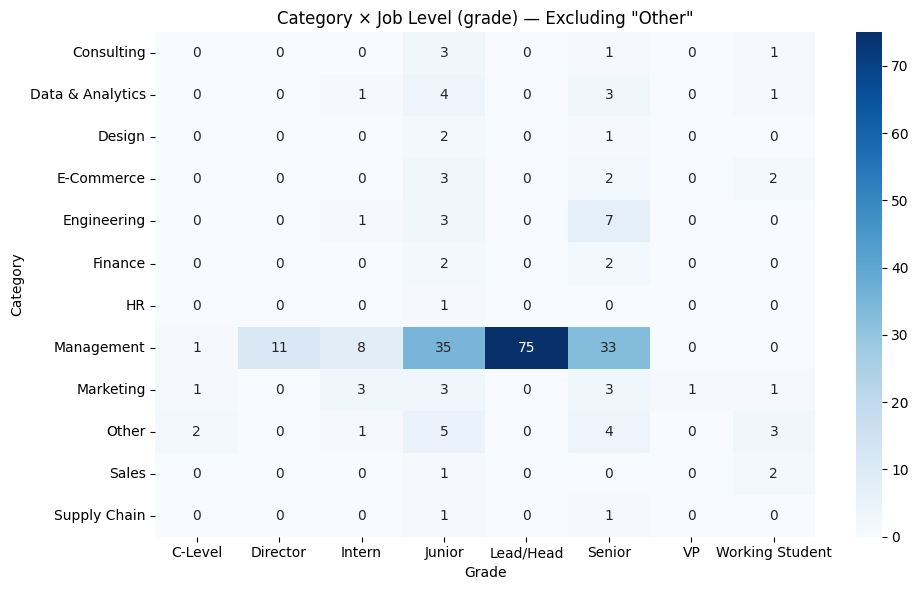

In [ ]:
# Удаляем строки, где grade == 'Other'
filtered_data = data_linkedin[data_linkedin['grade'] != 'Other']

# Кросс-таблица: category × grade
ct = pd.crosstab(filtered_data['category'], filtered_data['grade'])

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')

plt.title('Category × Job Level (grade) — Excluding "Other"')
plt.ylabel('Category')
plt.xlabel('Grade')
plt.tight_layout()
plt.show()

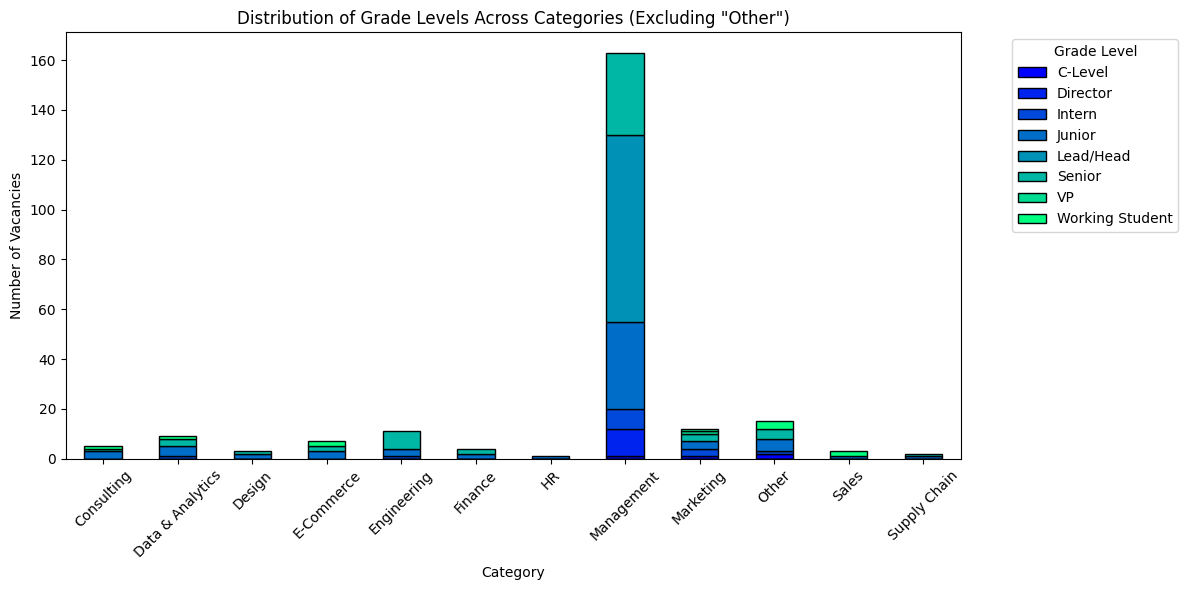

In [ ]:
# Удаляем строки, где grade == 'Other'
filtered_data = data_linkedin[data_linkedin['grade'] != 'Other']

# Кросс-таблица: категория × уровень
ct_grade = pd.crosstab(filtered_data['category'], filtered_data['grade'])

# Построение stacked bar chart с границами
ax = ct_grade.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 6),
    colormap='winter',
    edgecolor='black'  # Чёткие границы между сегментами
)

plt.title('Distribution of Grade Levels Across Categories (Excluding "Other")')
plt.xlabel('Category')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)
plt.legend(title='Grade Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

***Category × Employment Type (employment (Excluding "Other"))***

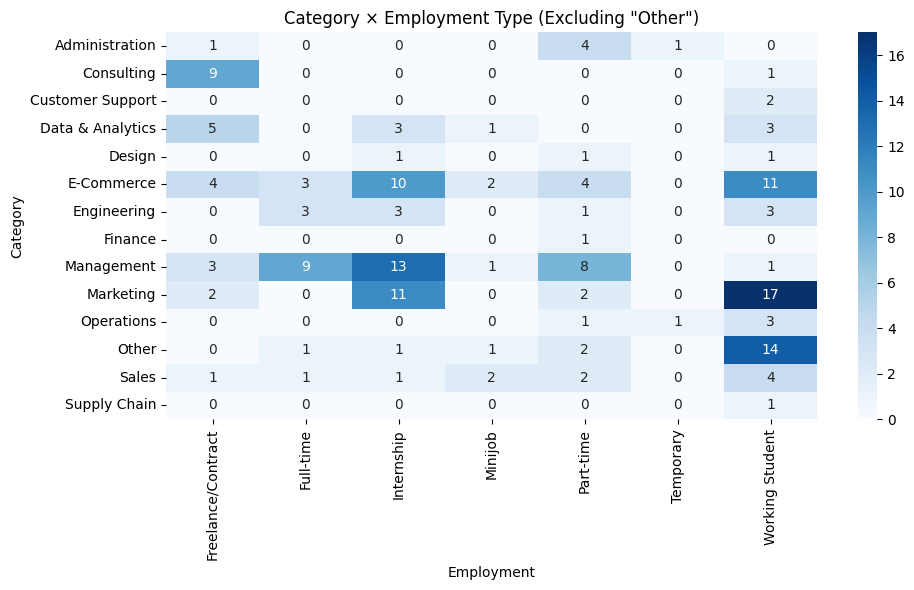

In [ ]:
# Удаляем строки, где employment == 'Other'
filtered_data = data_linkedin[data_linkedin['employment'] != 'Other']

# Кросс-таблица: category × employment
ct = pd.crosstab(filtered_data['category'], filtered_data['employment'])

# Построение тепловой карты
plt.figure(figsize=(10, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')

plt.title('Category × Employment Type (Excluding "Other")')
plt.ylabel('Category')
plt.xlabel('Employment')
plt.tight_layout()
plt.show()

***Category vs Employment Type: Bubble Chart of Job Listings***

In [ ]:
# Фильтрация: убираем строки с 'Other' в ключевых колонках
filtered_data = data_linkedin[
    (data_linkedin['category'] != 'Other') &
    (data_linkedin['employment'] != 'Other')
]

# Группировка: считаем количество вакансий по комбинации category, employment, is_remote
grouped = filtered_data.groupby(['category', 'employment', 'is_remote']).size().reset_index(name='count')

# Преобразуем удалённость в читаемый формат
grouped['remote_status'] = grouped['is_remote'].map({True: 'Remote', False: 'On-site'})

# Построение интерактивной пузырьковой диаграммы
fig = px.scatter(
    grouped,
    x='category',
    y='employment',
    size='count',
    color='remote_status',
    hover_name='category',
    hover_data={'count': True, 'employment': True, 'remote_status': True},
    title='Category vs Employment Type: Bubble Chart of Job Listings',
    size_max=40,
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Employment Type',
    legend_title='Remote Status',
    xaxis=dict(tickangle=45)
)

fig.show()

***The basis for business analysis: where to look for internships, flexible work, and stable employment***

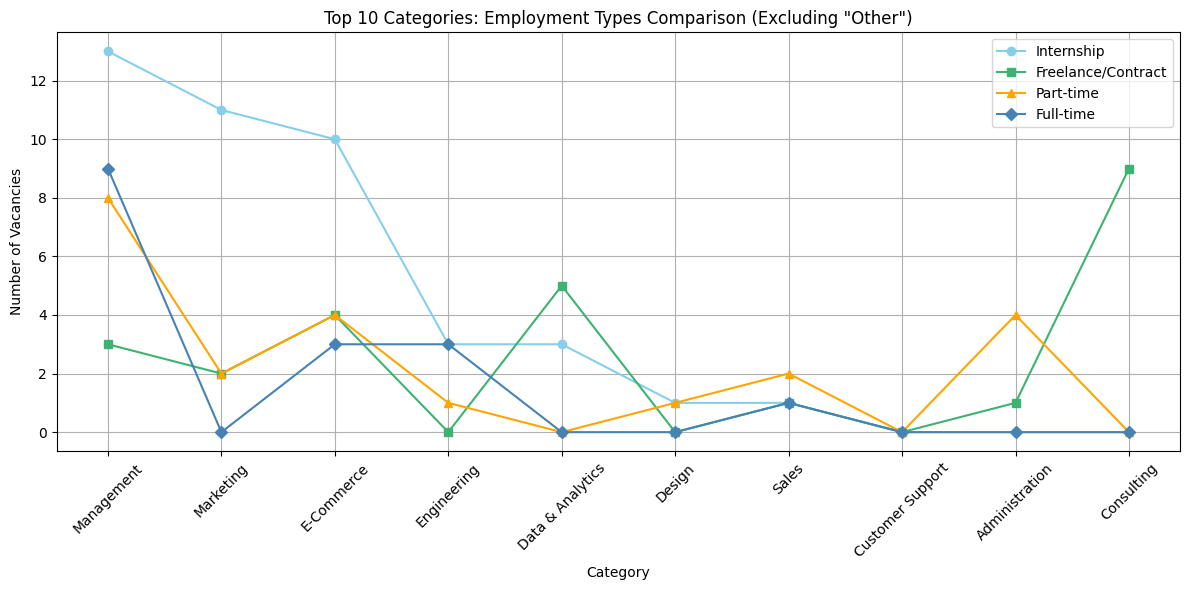

In [ ]:
# Удаляем строки, где category == 'Other'
filtered_data = data_linkedin[data_linkedin['category'] != 'Other']

# Кросс-таблица: category × employment
employment_ct = pd.crosstab(filtered_data['category'], filtered_data['employment'])

# Сортировка по Internship и выбор топ-10 категорий
top_categories = employment_ct.sort_values(by='Internship', ascending=False).head(10).index

# Получаем значения
internship = employment_ct.loc[top_categories, 'Internship']
freelance = employment_ct.loc[top_categories, 'Freelance/Contract']
part_time = employment_ct.loc[top_categories, 'Part-time']
full_time = employment_ct.loc[top_categories, 'Full-time']

# Построение графика
plt.figure(figsize=(12, 6))
plt.plot(top_categories, internship, marker='o', label='Internship', color='skyblue')
plt.plot(top_categories, freelance, marker='s', label='Freelance/Contract', color='mediumseagreen')
plt.plot(top_categories, part_time, marker='^', label='Part-time', color='orange')
plt.plot(top_categories, full_time, marker='D', label='Full-time', color='steelblue')

plt.title('Top 10 Categories: Employment Types Comparison (Excluding "Other")')
plt.xlabel('Category')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

***Job Levels (grade, Excluding "Other")***

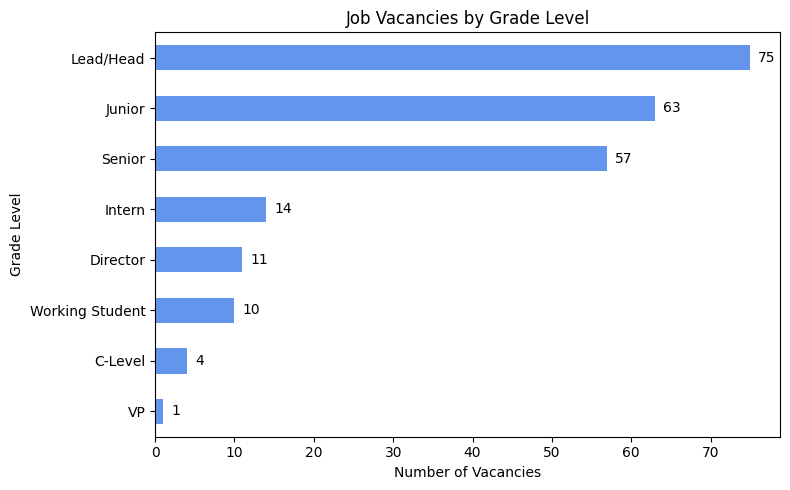

In [ ]:
# Удаляем 'Other' и сортируем по количеству
grade_counts = data_linkedin[data_linkedin['grade'] != 'Other']['grade'].value_counts().sort_values(ascending=True)

# Горизонтальная диаграмма
plt.figure(figsize=(8, 5))
grade_counts.plot(kind='barh', color='cornflowerblue')

plt.title('Job Vacancies by Grade Level')
plt.xlabel('Number of Vacancies')
plt.ylabel('Grade Level')

# Добавим цифры с жирным шрифтом
for i, value in enumerate(grade_counts):
    plt.text(value + 1, i, str(value), va='center')

plt.tight_layout()
plt.show()

In [ ]:
data_linkedin['grade'].value_counts()

,count
grade,
Other,575
Lead/Head,75
Junior,63
Senior,57
Intern,14
Director,11
Working Student,10
C-Level,4
VP,1


***Heatmap: Category × Industry (Excluding "Other")***

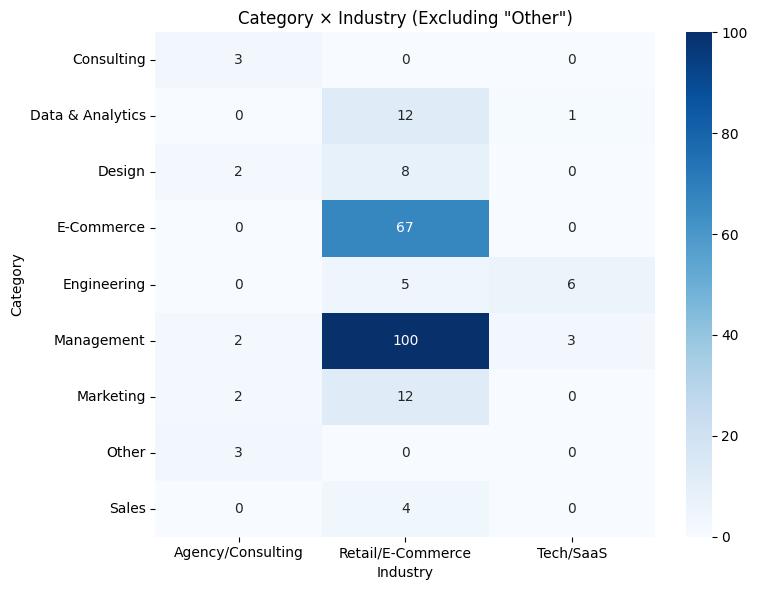

In [ ]:
# Удаляем строки, где industry == 'Other'
filtered_data = data_linkedin[data_linkedin['industry'] != 'Other']

# Кросс-таблица: category × industry
ct = pd.crosstab(filtered_data['category'], filtered_data['industry'])

# Построение тепловой карты
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, fmt='d', cmap='Blues')

plt.title('Category × Industry (Excluding "Other")')
plt.ylabel('Category')
plt.xlabel('Industry')
plt.tight_layout()
plt.show()

***Job Vacancies by Industry (Excluding "Other")***

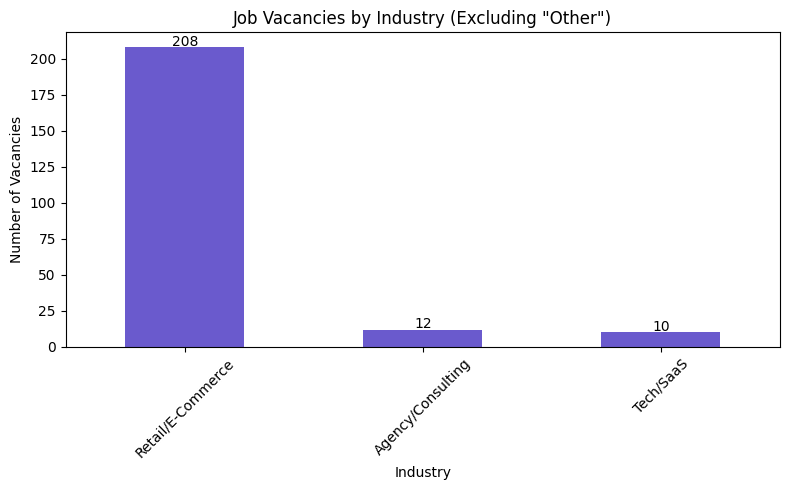

In [ ]:
# Удаляем строки, где industry == 'Other'
filtered_data = data_linkedin[data_linkedin['industry'] != 'Other']

# Подсчёт количества вакансий по индустриям
industry_counts = filtered_data['industry'].value_counts().sort_values(ascending=False)

# Построение вертикальной диаграммы
plt.figure(figsize=(8, 5))
industry_counts.plot(kind='bar', color='slateblue')

plt.title('Job Vacancies by Industry (Excluding "Other")')
plt.xlabel('Industry')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)

# Добавим цифры над столбцами
for i, value in enumerate(industry_counts):
    plt.text(i, value + 1, str(value), ha='center')

plt.tight_layout()
plt.show()

***Top Industries Across Regions***

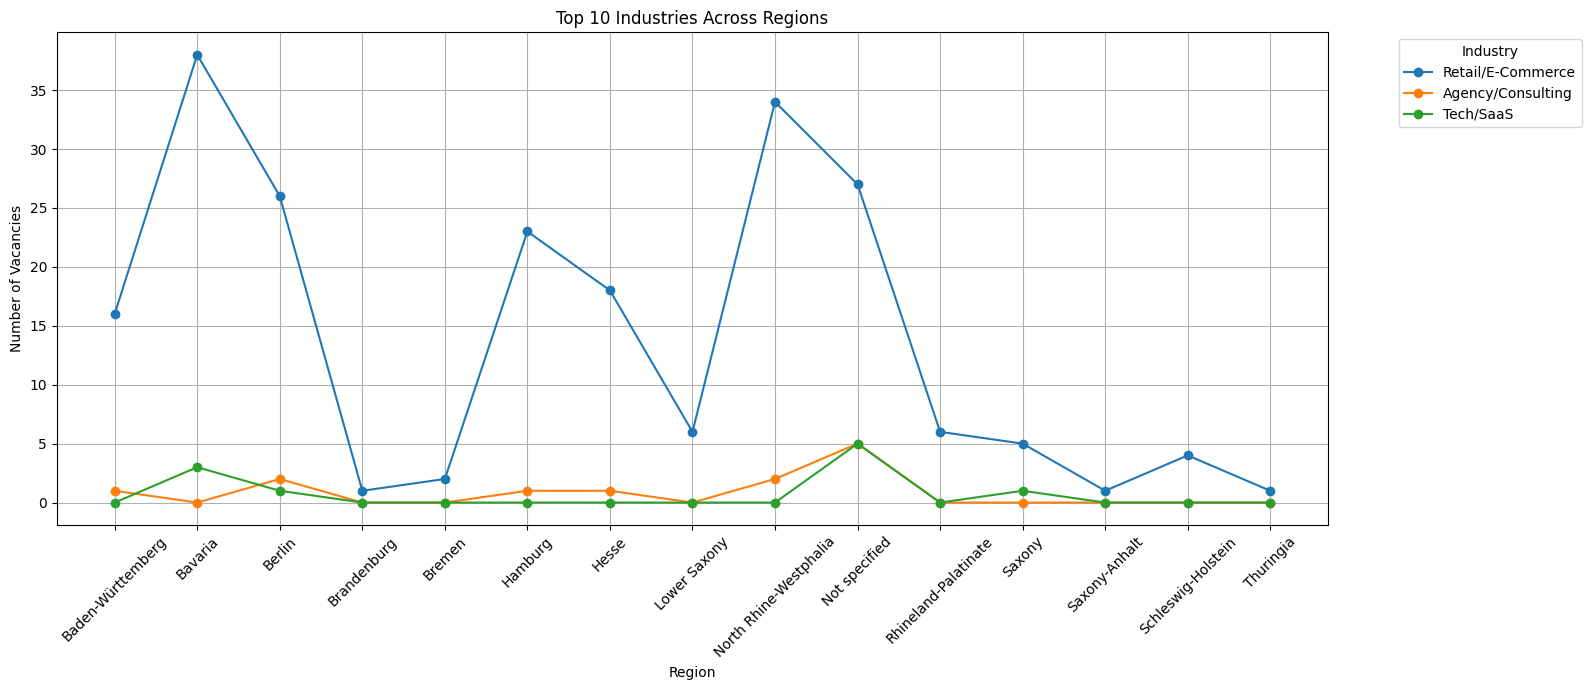

In [ ]:
# Фильтрация: исключаем 'Other'
filtered_data = data_linkedin[
    (data_linkedin['industry'] != 'Other') &
    (data_linkedin['region'] != 'Other')
]

# Кросс-таблица: industry × region
industry_region_ct = pd.crosstab(filtered_data['industry'], filtered_data['region'])

# Выбор топ-10 индустрий по общему количеству вакансий
top_industries = industry_region_ct.sum(axis=1).sort_values(ascending=False).head(10).index

# Получаем значения по регионам для этих индустрий
selected_data = industry_region_ct.loc[top_industries]

# Построение графика
plt.figure(figsize=(16, 7))

for industry in selected_data.index:
    plt.plot(
        selected_data.columns,
        selected_data.loc[industry],
        marker='o',
        label=industry
    )

plt.title('Top 10 Industries Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)
plt.legend(title='Industry', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Фильтрация
filtered_data = data_linkedin[
    (data_linkedin['category'] != 'Other') &
    (data_linkedin['region'] != 'Other') &
    (data_linkedin['employment'] != 'Other')
]

# Группировка
grouped = filtered_data.groupby(['category', 'region', 'employment']).size().reset_index(name='count')

# Построение пузырьковой диаграммы
fig = px.scatter(
    grouped,
    x='category',
    y='region',
    size='count',
    color='employment',
    hover_name='category',
    hover_data={'region': True, 'employment': True, 'count': True},
    title='Category vs Region vs Employment Type',
    size_max=40,
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Category',
    yaxis_title='Region',
    legend_title='Employment Type',
    xaxis=dict(tickangle=45)
)

fig.show()

***Geography: by cities and regions***

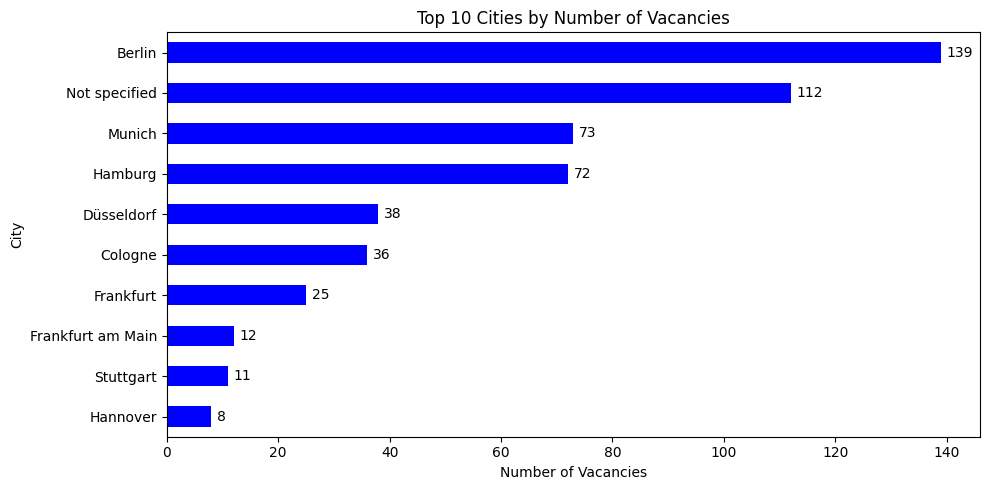

In [ ]:
# Get top 10 cities sorted ascending for horizontal bar chart
city_counts = data_linkedin['city'].value_counts().head(10).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 5))
ax = city_counts.plot(kind='barh', color='blue')

plt.title('Top 10 Cities by Number of Vacancies')
plt.xlabel('Number of Vacancies')
plt.ylabel('City')

# Add value labels to each bar
for i, value in enumerate(city_counts):
    plt.text(value + 1, i, str(value), va='center')

plt.tight_layout()
plt.show()

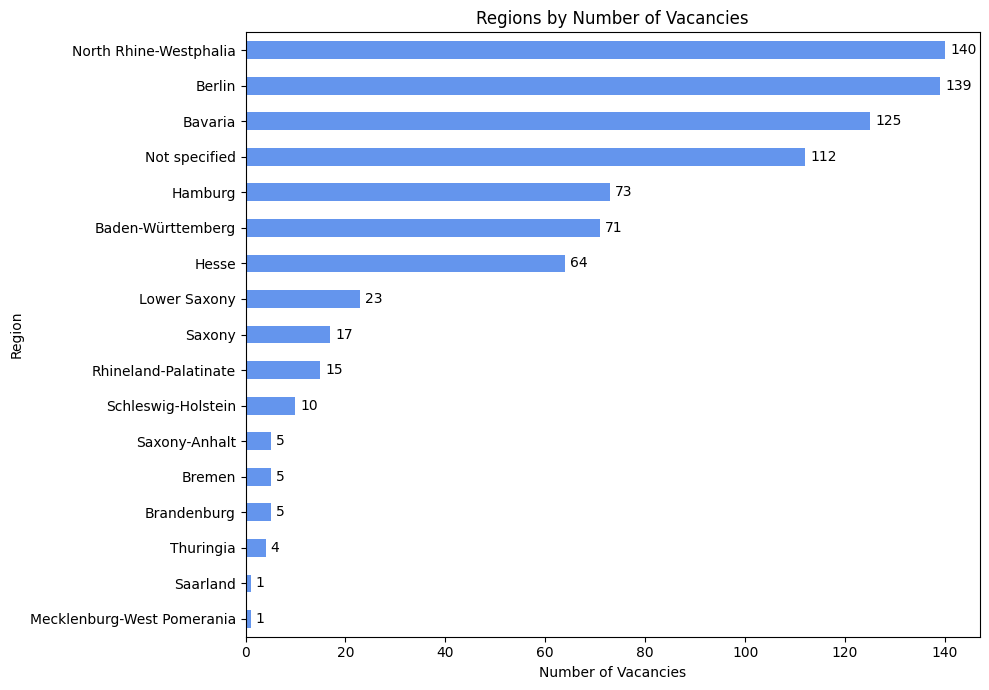

In [ ]:
# Count and sort regions by number of vacancies
region_counts = data_linkedin['region'].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 7))
ax = region_counts.plot(kind='barh', color='cornflowerblue')

plt.title('Regions by Number of Vacancies')
plt.xlabel('Number of Vacancies')
plt.ylabel('Region')

# Add value labels to each bar
for i, value in enumerate(region_counts):
    plt.text(value + 1, i, str(value), va='center')

plt.tight_layout()
plt.show()

***Remote or On-site (including "Other")***

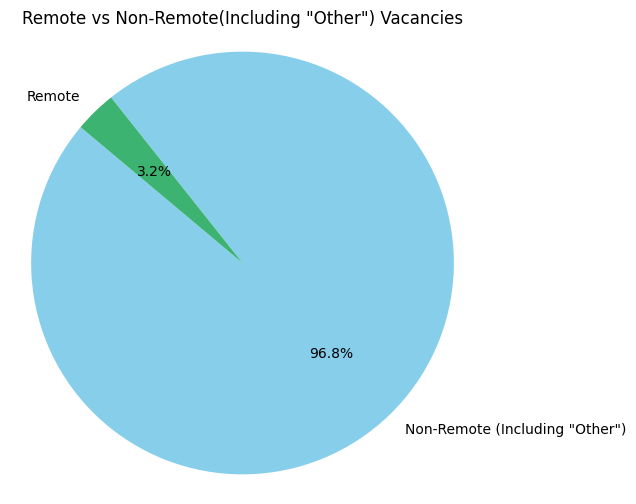

In [ ]:
import matplotlib.pyplot as plt

# Подсчёт количества вакансий по признаку удалённости
remote_counts = data_linkedin['is_remote'].value_counts()
labels = ['Non-Remote (Including "Other")', 'Remote']
sizes = [remote_counts.get(False, 0), remote_counts.get(True, 0)]
colors = ['skyblue', 'mediumseagreen']

# Построение круговой диаграммы
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Remote vs Non-Remote(Including "Other") Vacancies')
plt.axis('equal')  # Сохраняет круговую форму
plt.show()

***Distribution of Employment Types (Excluding "Other")***

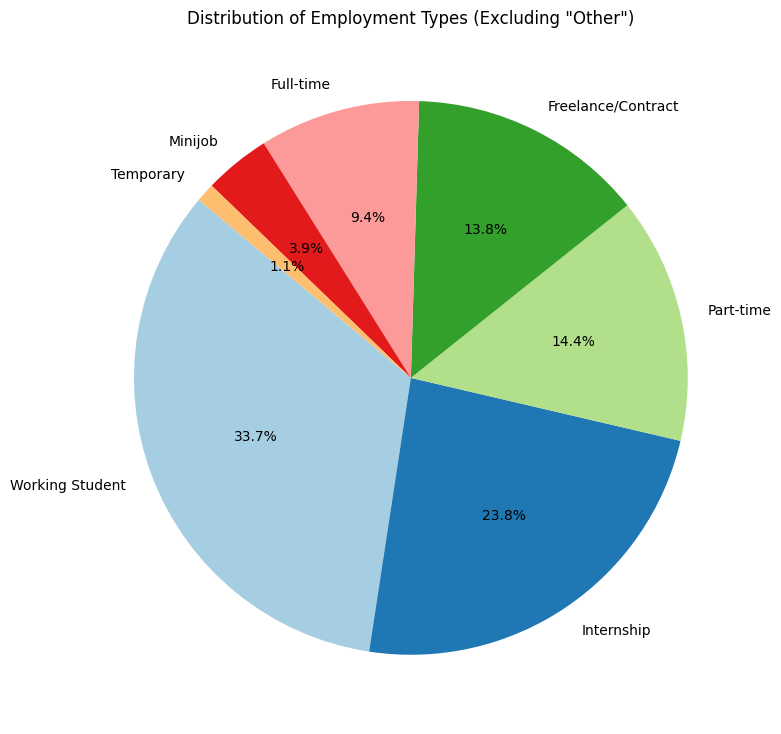

In [ ]:
# Удаляем строки, где employment == 'Other'
filtered_data = data_linkedin[data_linkedin['employment'] != 'Other']

# Подсчёт количества по типам занятости
employment_counts = filtered_data['employment'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(
    employment_counts,
    labels=employment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors
)

plt.title('Distribution of Employment Types (Excluding "Other")')
plt.tight_layout()
plt.show()

***Employment Type (Excluding "Other"): Remote vs On-site***

<Figure size 1000x600 with 0 Axes>

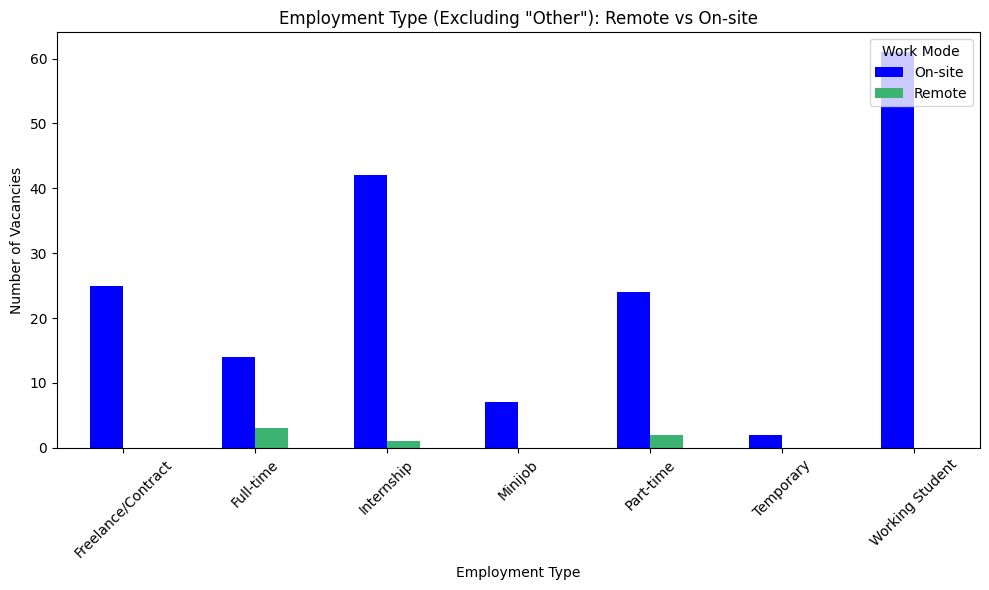

In [ ]:
# Удаляем строки, где employment == 'Other'
filtered_data = data_linkedin[data_linkedin['employment'] != 'Other']

# Кросс-таблица: is_remote × employment
remote_employment_ct = pd.crosstab(filtered_data['employment'], filtered_data['is_remote'])

# Переименуем столбцы для читаемости
remote_employment_ct.columns = ['On-site', 'Remote']

# Построение grouped bar chart без edgecolor
plt.figure(figsize=(10, 6))
remote_employment_ct.plot(kind='bar', figsize=(10, 6), color=['blue', 'mediumseagreen'])

plt.title('Employment Type (Excluding "Other"): Remote vs On-site')
plt.xlabel('Employment Type')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)
plt.legend(title='Work Mode', loc='upper right')
plt.tight_layout()
plt.show()

In [ ]:
data_linkedin.groupby(['is_remote', 'category']).size().unstack().fillna(0)

category,Administration,Consulting,Customer Support,Data & Analytics,Design,E-Commerce,Engineering,Finance,HR,Management,Marketing,Operations,Other,Sales,Supply Chain
is_remote,,,,,,,,,,,,,,,
False,13.0,11.0,5.0,36.0,29.0,72.0,42.0,8.0,7.0,361.0,90.0,10.0,72.0,23.0,5.0
True,0.0,0.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0,15.0,2.0,0.0,1.0,0.0,0.0


***Top 10 Companies by Number of Job Vacancies. Companies that are actively looking for staff***

In [ ]:
# Группируем по компании и считаем количество job_url
top_companies = (
    data_linkedin
    .groupby('company')['job_url']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

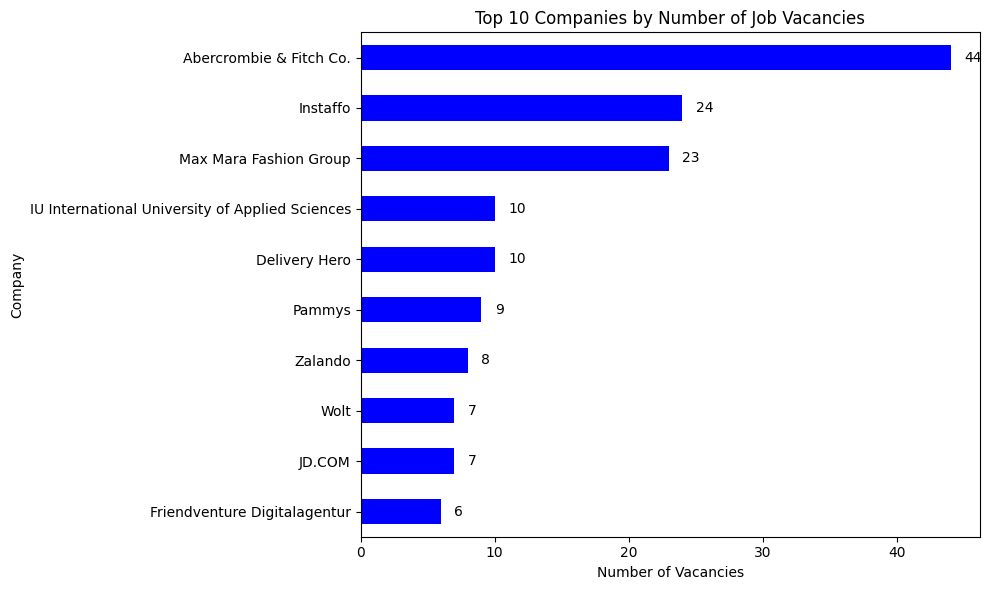

In [ ]:
# Строим график
ax = top_companies.plot(kind='barh', figsize=(10, 6), color='blue')
plt.title('Top 10 Companies by Number of Job Vacancies')
plt.xlabel('Number of Vacancies')
plt.ylabel('Company')
plt.gca().invert_yaxis()

# Добавляем подписи к каждому столбцу
for i, v in enumerate(top_companies):
    ax.text(v + 1, i, str(v), va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

***Company vs Grade: Bubble Chart of Job Vacancies***

In [ ]:
# Фильтрация: убираем строки с 'Other' в ключевых колонках
filtered_data = data_linkedin[
    (data_linkedin['company'] != 'Other') &
    (data_linkedin['grade'] != 'Other') &
    (data_linkedin['employment'] != 'Other')
]

# Группировка: считаем количество вакансий по комбинации company, grade, employment, is_remote
grouped = filtered_data.groupby(['company', 'grade', 'employment', 'is_remote']).size().reset_index(name='count')

# Добавим колонку для цвета: объединяем тип занятости и удалённость
grouped['color_label'] = grouped['employment'] + ' | ' + grouped['is_remote'].map({True: 'Remote', False: 'On-site'})

# Построение интерактивной пузырьковой диаграммы
fig = px.scatter(
    grouped,
    x='company',
    y='grade',
    size='count',
    color='color_label',
    hover_name='company',
    hover_data={'count': True, 'employment': True, 'is_remote': True},
    title='Company vs Grade (Excluding "Other"): Bubble Chart of Job Vacancies',
    size_max=40,
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Company',
    yaxis_title='Grade',
    legend_title='Employment & Remote Status',
    xaxis=dict(tickangle=45)
)

fig.show()

**Top 10 Companies by Employment Type***

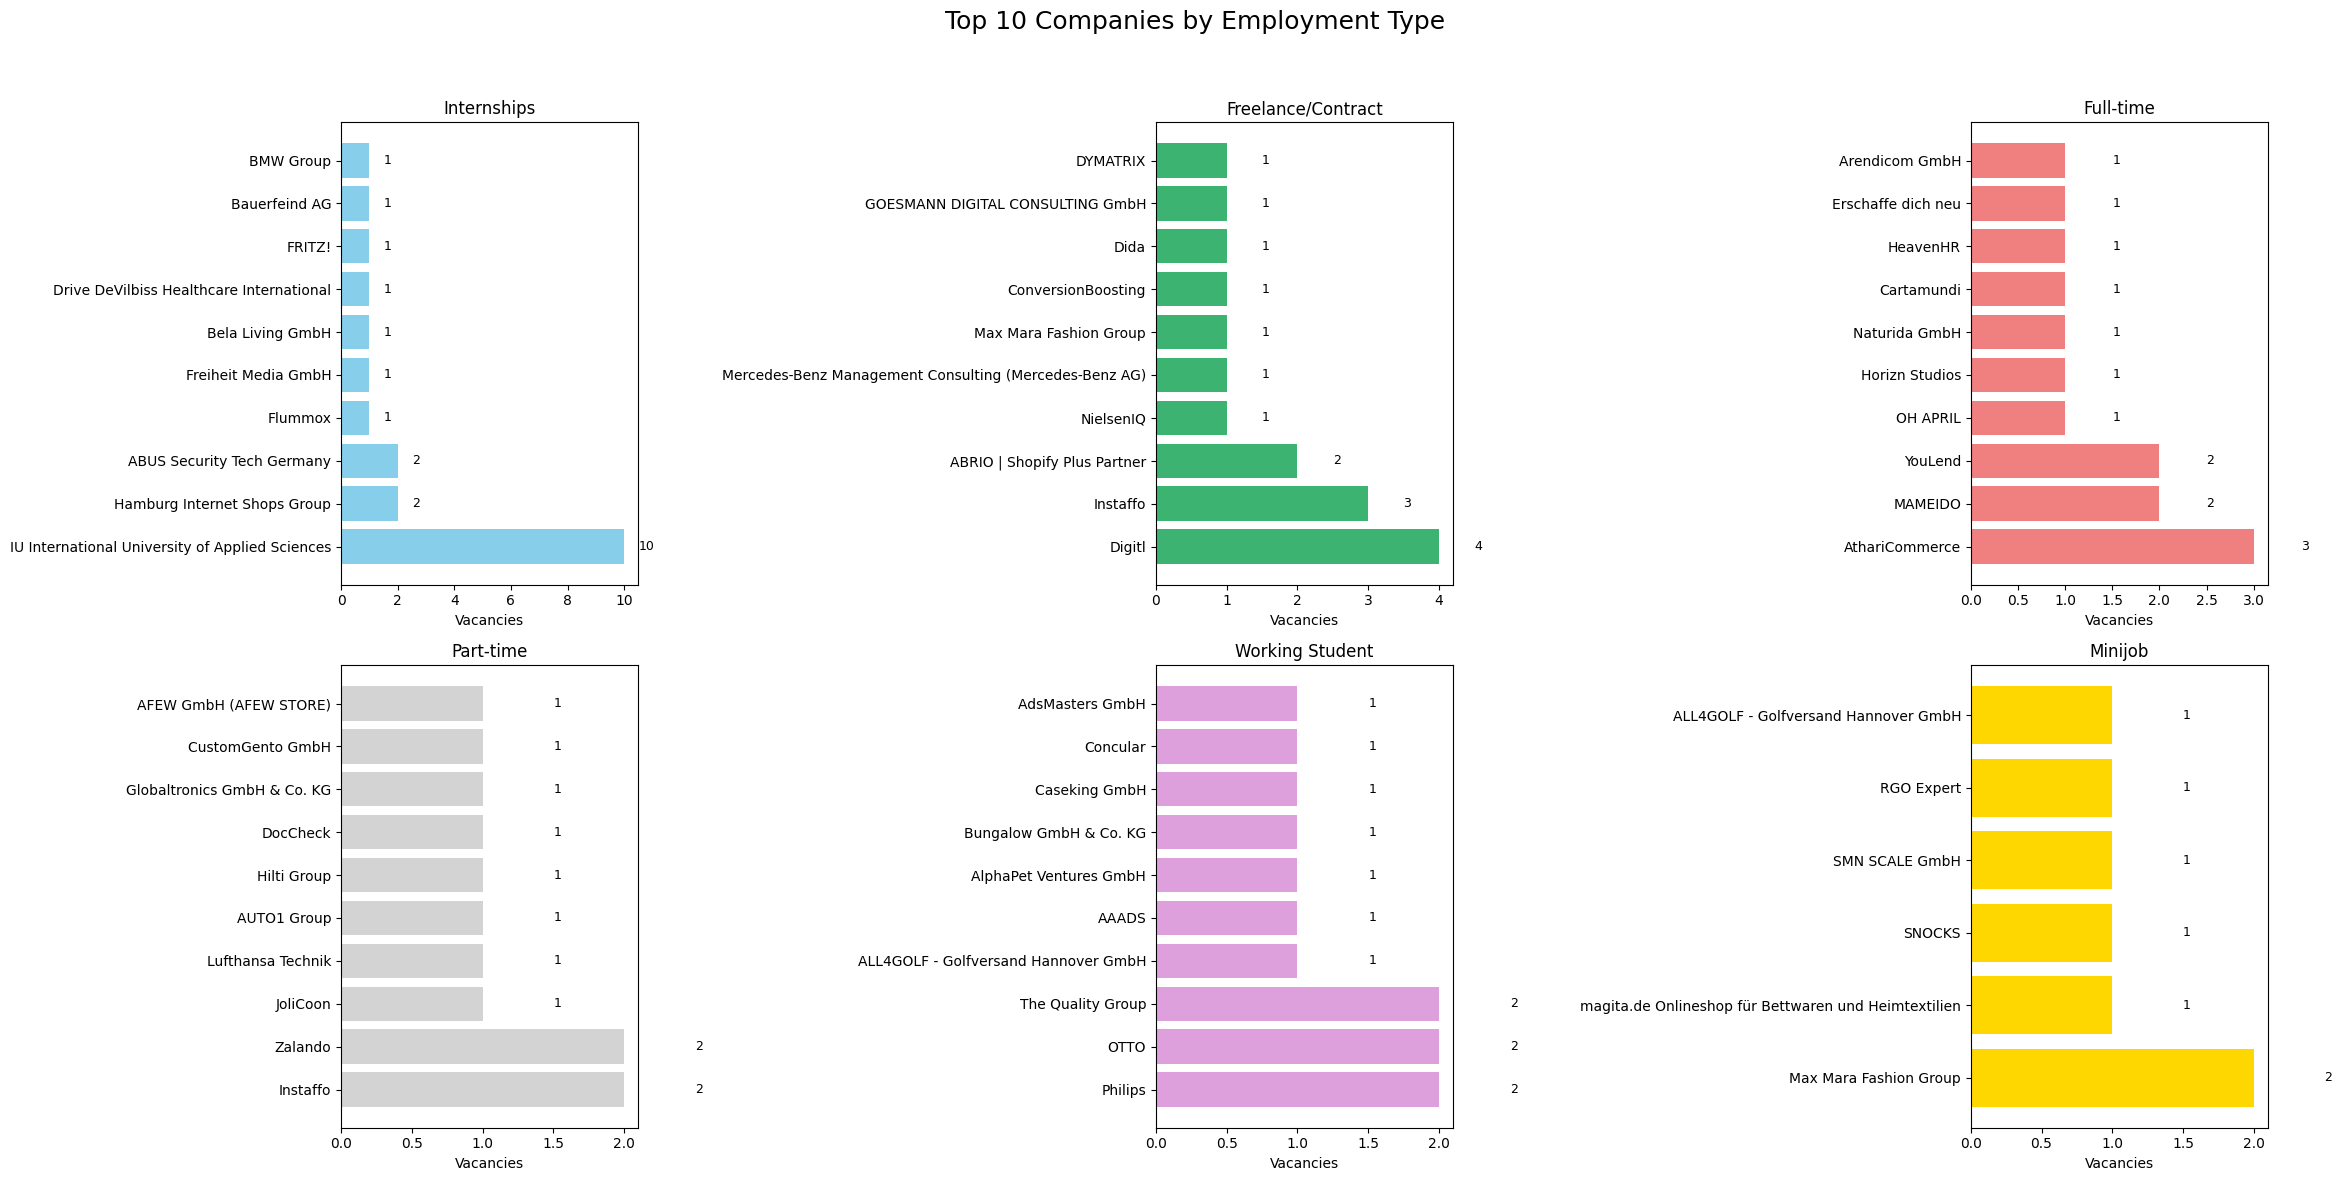

In [ ]:
# Типы занятости, которые нас интересуют
employment_types = [
    'Internship',
    'Freelance/Contract',
    'Full-time',
    'Part-time',
    'Working Student',
    'Minijob'
]

# Цвета для каждого графика
colors = [
    'skyblue',
    'mediumseagreen',
    'lightcoral',
    'lightgray',
    'plum',
    'gold'
]

# Заголовки для каждого графика
titles = [
    'Internships',
    'Freelance/Contract',
    'Full-time',
    'Part-time',
    'Working Student',
    'Minijob'
]

# Подготовка данных: список из Series
top_lists = []
for emp_type in employment_types:
    filtered = data_linkedin[data_linkedin['employment'] == emp_type]
    counts = (
        filtered
        .groupby('company')['job_url']
        .count()
        .sort_values(ascending=False)
        .head(10)
        .sort_values(ascending=True)  # для barh
    )
    top_lists.append(counts)

# Построение 6 графиков: 2 строки × 3 столбца
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24, 12))

for i in range(6):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    ax.barh(top_lists[i].index, top_lists[i].values, color=colors[i])
    ax.set_title(titles[i])
    ax.set_xlabel('Vacancies')
    ax.invert_yaxis()
    for j, v in enumerate(top_lists[i].values):
        ax.text(v + 0.5, j, str(v), va='center', fontsize=9)

# Общий заголовок
fig.suptitle('Top 10 Companies by Employment Type', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

***Timeline of Job Postings***

In [ ]:
# Убедимся, что дата в правильном формате
data_linkedin['date_posted'] = pd.to_datetime(data_linkedin['date_posted'])

# Группировка: количество вакансий по дате
timeline_data = data_linkedin.groupby('date_posted').size().reset_index(name='count')

In [ ]:
# Добавляем колонку с названием дня недели
timeline_data['weekday'] = timeline_data['date_posted'].dt.day_name()

# Построение графика
fig = px.line(
    timeline_data,
    x='date_posted',
    y='count',
    title='Timeline of Job Postings',
    markers=True,
    labels={'date_posted': 'Date', 'count': 'Number of Vacancies'},
    hover_data={'weekday': True},  # добавляем день недели во всплывающую подсказку
    template='plotly_white'
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Number of Vacancies'
)

fig.show()

***Job Postings by Day of the Week***

In [ ]:
# Убедимся, что дата в правильном формате
data_linkedin['date_posted'] = pd.to_datetime(data_linkedin['date_posted'])

# Добавим колонку с названием дня недели
data_linkedin['weekday'] = data_linkedin['date_posted'].dt.day_name()

In [ ]:
weekday_counts = data_linkedin['weekday'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

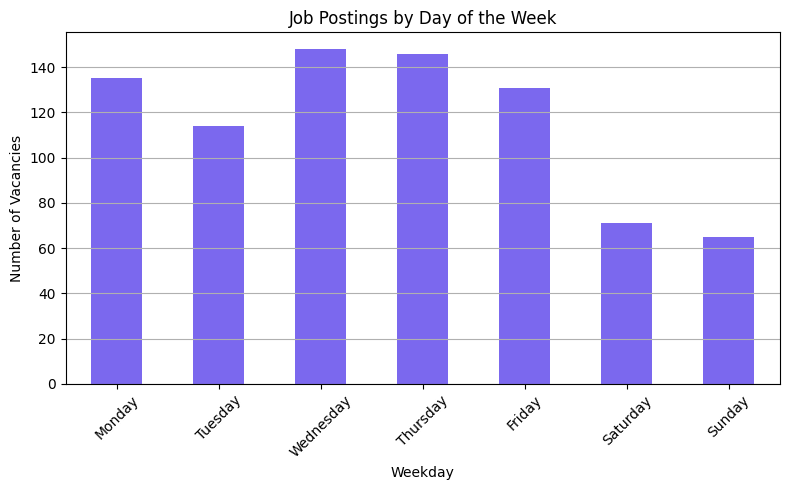

In [ ]:
plt.figure(figsize=(8, 5))
weekday_counts.plot(kind='bar', color='mediumslateblue')
plt.title('Job Postings by Day of the Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Vacancies')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

***E-Commerce***

*Words related to online commerce, platforms, shops, and logistics:*

***Technologies and Platforms***

- Shopify
- Magento
- WooCommerce
- PrestaShop
- Amazon Seller Central
- ERP-Systeme (например, SAP, JTL, Plentymarkets)
- PIM-Systeme (Product Information Management)
- Google Analytics
- Google Ads
- Meta Ads
- Klarna
- PayPal
- Stripe
- Amazon
- eBay
- Zalando


In [ ]:
# Преобразуем столбец title в Series и приведем к нижнему регистру
titles = data_linkedin['title'].fillna('').astype(str).str.lower()

# Список ключевых слов и фраз
keywords = [
    'shopify', 'magento', 'woocommerce', 'prestashop', 'amazon seller central',
    'erp-systeme', 'sap', 'jtl', 'plentymarkets',
    'pim-systeme', 'product information management',
    'google analytics', 'google ads', 'crm', 'meta ads',
    'klarna', 'paypal', 'stripe',
    'amazon', 'ebay', 'zalando'
]

# Подсчет вхождений
keyword_counts = {}
for keyword in keywords:
    pattern = rf'\b{keyword.lower()}\b'
    count = titles.str.count(pattern).sum()
    keyword_counts[keyword] = int(count)

# Преобразуем в DataFrame
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Выводим результат
print(keyword_df.to_string(index=False))


                       Keyword  Count
                        amazon     17
                           crm     12
                       shopify     10
                    google ads      4
                       magento      3
                      meta ads      1
                          ebay      1
                           sap      1
                   woocommerce      0
         amazon seller central      0
                    prestashop      0
                           jtl      0
                   erp-systeme      0
              google analytics      0
product information management      0
                   pim-systeme      0
                 plentymarkets      0
                        paypal      0
                        klarna      0
                        stripe      0
                       zalando      0


***Operational Processes***

- Produktdatenpflege (обработка товарных данных)
- Bestandsmanagement (управление запасами)
- Retourenmanagement (обработка возвратов)
- Versandabwicklung (логистика и доставка)
- Dropshipping
- Fulfillment
- Lagerlogistik


In [ ]:
# Преобразуем столбец title в Series и приведем к нижнему регистру
titles = data_linkedin['title'].fillna('').astype(str).str.lower()

# Список ключевых слов и фраз
keywords = [
    'produktdatenpflege',
    'bestandsmanagement',
    'retourenmanagement',
    'versandabwicklung',
    'dropshipping',
    'fulfillment',
    'lagerlogistik',
    'product data management',
    'inventory management',
    'returns management',
    'shipping operations',
    'dropshipping',
    'fulfillment',
    'warehouse logisticдs'
]

# Подсчет вхождений
keyword_counts = {}
for keyword in keywords:
    pattern = rf'\b{keyword.lower()}\b'
    count = titles.str.count(pattern).sum()
    keyword_counts[keyword] = int(count)

# Преобразуем в DataFrame
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Выводим результат
print(keyword_df.to_string(index=False))

                Keyword  Count
          lagerlogistik      2
            fulfillment      2
     produktdatenpflege      0
     bestandsmanagement      0
      versandabwicklung      0
     retourenmanagement      0
           dropshipping      0
product data management      0
   inventory management      0
     returns management      0
    shipping operations      0
    warehouse logistics      0


***Sales and transactions***

- checkout
- payment gateway
- paypal
- stripe
- conversion rate
- cart abandonment
- upselling
- cross-selling


In [ ]:
# Преобразуем столбец title в Series и приведем к нижнему регистру
titles = data_linkedin['title'].fillna('').astype(str).str.lower()

# Список ключевых слов и фраз
keywords = [
    'checkout',
    'zahlungs-gateway',
    'paypal',
    'stripe',
    'konversionsrate',
    'warenkorbabbruch',
    'upselling',
    'cross-selling',
    'payment gateway',
    'conversion rate',
    'cart abandonment'
]

# Подсчет вхождений
keyword_counts = {}
for keyword in keywords:
    pattern = rf'\b{keyword.lower()}\b'
    count = titles.str.count(pattern).sum()
    keyword_counts[keyword] = int(count)

# Преобразуем в DataFrame
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Выводим результат
print(keyword_df.to_string(index=False))

         Keyword  Count
 conversion rate      1
zahlungs-gateway      0
        checkout      0
          paypal      0
          stripe      0
warenkorbabbruch      0
 konversionsrate      0
       upselling      0
   cross-selling      0
 payment gateway      0
cart abandonment      0


***Marketing and Analytics***

- Conversion Rate Optimization (CRO)
- SEO / SEA
- Performance Marketing
- A/B Testing
- Customer Journey Mapping
- Newsletter Marketing
- Affiliate Marketing
- Social Commerce


In [ ]:
# Преобразуем столбец title в Series и приведем к нижнему регистру
titles = data_linkedin['title'].fillna('').astype(str).str.lower()

# Список ключевых слов и фраз
keywords = [
    'conversion rate optimization',
    'cro',
    'seo',
    'sea',
    'performance marketing',
    'a/b testing',
    'customer journey mapping',
    'newsletter marketing',
    'affiliate marketing',
    'social commerce',
    'conversion-rate-optimierung',
    'a/b-test',
    'customer-journey'
]

# Подсчет вхождений
keyword_counts = {}
for keyword in keywords:
    pattern = rf'\b{keyword.lower()}\b'
    count = titles.str.count(pattern).sum()
    keyword_counts[keyword] = int(count)

# Преобразуем в DataFrame
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Выводим результат
print(keyword_df.to_string(index=False))

                     Keyword  Count
                         seo     13
       performance marketing     10
                         sea      8
                 a/b testing      1
conversion rate optimization      0
                         cro      0
    customer journey mapping      0
        newsletter marketing      0
         affiliate marketing      0
             social commerce      0
 conversion-rate-optimierung      0
                    a/b-test      0
            customer-journey      0


***Roles and professions***

- E-Commerce Manager
- Online Shop Manager
- Marketplace Manager
- Product Data Specialist
- Online Merchandiser
- Category Manager
- Conversion Manager
- Digital Sales Manager
- Fulfillment Specialist
- Logistics Coordinator
- Customer Experience Manager

In [ ]:
# Преобразуем столбец title в Series и приведем к нижнему регистру
titles = data_linkedin['title'].fillna('').astype(str).str.lower()

# Список ключевых слов и фраз
keywords = [
    'e-commerce manager',
    'online shop manager',
    'marketplace manager',
    'product data specialist',
    'online merchandiser',
    'category manager',
    'conversion manager',
    'digital sales manager',
    'fulfillment specialist',
    'logistics coordinator',
    'customer experience manager',
    'produktdaten spezialist',
    'online merchandiser',
    'conversion manager',
    'digital sales manager',
    'fulfillment spezialist',
    'logistik koordinator'
]

# Подсчет вхождений
keyword_counts = {}
for keyword in keywords:
    pattern = rf'\b{keyword.lower()}\b'
    count = titles.str.count(pattern).sum()
    keyword_counts[keyword] = int(count)

# Преобразуем в DataFrame
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Выводим результат
print(keyword_df.to_string(index=False))

                    Keyword  Count
         e-commerce manager     25
        marketplace manager      6
           category manager      6
        online shop manager      3
         conversion manager      1
    product data specialist      0
        online merchandiser      0
      digital sales manager      0
     fulfillment specialist      0
      logistics coordinator      0
customer experience manager      0
    produktdaten spezialist      0
     fulfillment spezialist      0
       logistik koordinator      0


***Language and Soft Skills***

- Deutschkenntnisse (B2/C1)
- Englischkenntnisse
- Kommunikationsfähigkeit
- Teamfähigkeit
- Eigenverantwortung
- Analytisches Denken


In [ ]:
# Преобразуем столбец title в Series и приведем к нижнему регистру
titles = data_linkedin['title'].fillna('').astype(str).str.lower()

# Список ключевых слов и фраз
keywords = [
    'deutschkenntnisse',
    'englischkenntnisse',
    'kommunikationsfähigkeit',
    'teamfähigkeit',
    'eigenverantwortung',
    'analytisches denken',
    'german language skills',
    'english language skills',
    'communication skills',
    'teamwork',
    'self-responsibility',
    'analytical thinking'
]

# Подсчет вхождений
keyword_counts = {}
for keyword in keywords:
    pattern = rf'\b{keyword.lower()}\b'
    count = titles.str.count(pattern).sum()
    keyword_counts[keyword] = int(count)

# Преобразуем в DataFrame
keyword_df = pd.DataFrame(list(keyword_counts.items()), columns=['Keyword', 'Count'])
keyword_df = keyword_df.sort_values(by='Count', ascending=False)

# Выводим результат
print(keyword_df.to_string(index=False))

                Keyword  Count
      deutschkenntnisse      0
     englischkenntnisse      0
kommunikationsfähigkeit      0
          teamfähigkeit      0
     eigenverantwortung      0
    analytisches denken      0
 german language skills      0
english language skills      0
   communication skills      0
               teamwork      0
    self-responsibility      0
    analytical thinking      0


In [ ]:
# Словарь с частотами ключевых слов
keyword_counts = {
    'amazon': 19,
    'crm': 12,
    'shopify': 10,
    'google ads': 4,
    'magento': 3,
    'meta ads': 1,
    'ebay': 1,
    'sap': 1,
    'lagerlogistik': 2,
    'fulfillment': 2,
    'conversion rate': 1,
    'seo': 13,
    'performance marketing': 10,
    'sea': 8,
    'a/b testing': 1,
    'e-commerce manager': 25,
    'category manager': 7,
    'marketplace manager': 6,
    'online shop manager': 3,
    'conversion manager': 1
}

In [ ]:
# Цвета по категориям
category_colors = {
    'Platforms & Tools': 'royalblue',
    'Operations': 'darkorange',
    'Conversion & Checkout': 'forestgreen',
    'Marketing & Analytics': 'crimson',
    'Roles': 'mediumpurple'
}

In [ ]:
# Назначение категорий
keyword_categories = {
    'amazon': 'Platforms & Tools',
    'crm': 'Platforms & Tools',
    'shopify': 'Platforms & Tools',
    'google ads': 'Platforms & Tools',
    'magento': 'Platforms & Tools',
    'meta ads': 'Platforms & Tools',
    'ebay': 'Platforms & Tools',
    'sap': 'Platforms & Tools',
    'lagerlogistik': 'Operations',
    'fulfillment': 'Operations',
    'conversion rate': 'Conversion & Checkout',
    'seo': 'Marketing & Analytics',
    'performance marketing': 'Marketing & Analytics',
    'sea': 'Marketing & Analytics',
    'a/b testing': 'Marketing & Analytics',
    'e-commerce manager': 'Roles',
    'category manager': 'Roles',
    'marketplace manager': 'Roles',
    'online shop manager': 'Roles',
    'conversion manager': 'Roles'
}

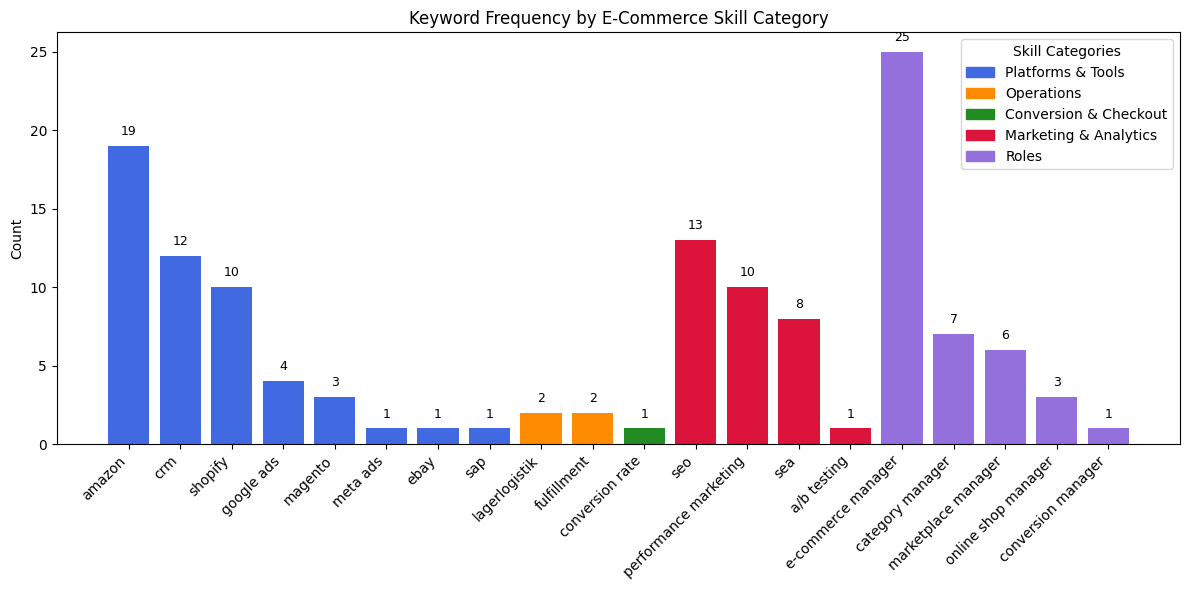

In [ ]:
# Построение графика
plt.figure(figsize=(12, 6))
bars = plt.bar(
    keyword_counts.keys(),
    keyword_counts.values(),
    color=[category_colors[keyword_categories[k]] for k in keyword_counts]
)

# Подписи над столбцами
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, str(height), ha='center', va='bottom', fontsize=9)

# Добавление легенды
legend_patches = [mpatches.Patch(color=color, label=category) for category, color in category_colors.items()]
plt.legend(handles=legend_patches, title='Skill Categories', loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.title('Keyword Frequency by E-Commerce Skill Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

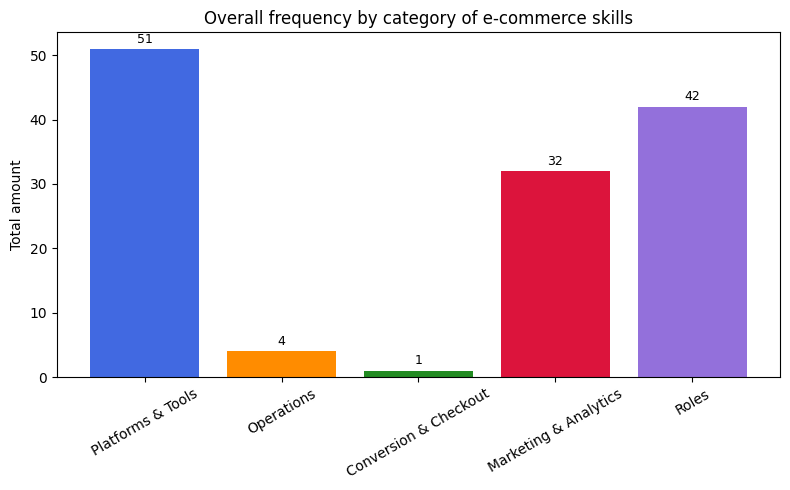

In [ ]:
from collections import Counter

# Суммируем частоты по категориям
category_totals = Counter()
for keyword, count in keyword_counts.items():
    category = keyword_categories.get(keyword, 'Other')
    category_totals[category] += count

# Подготовка данных
categories = list(category_totals.keys())
counts = list(category_totals.values())
colors = [category_colors[c] for c in categories]

# Визуализация
plt.figure(figsize=(8, 5))
bars = plt.bar(categories, counts, color=colors)

# Добавление числовых подписей
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        str(height),
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Overall frequency by category of e-commerce skills')
plt.ylabel('Total amount')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [ ]:
rare_keywords = [k for k, v in keyword_counts.items() if v == 1]
print("Редкие ключевые слова:", rare_keywords)

Редкие ключевые слова: ['meta ads', 'ebay', 'sap', 'conversion rate', 'a/b testing', 'conversion manager']


# ***Analytical Report on Job Postings on LinkedIn***

***Introduction***

The entire study focused on e-commerce.
The analysis included not only direct vacancies in this category, but also related positions that require skills relevant to e-commerce, such as:
- Digital marketing
- Data analytics and user behaviour
- Product and category management
- Customer service and logistics
- Content management and UX/UI

Thus, the study covers the ecosystem of vacancies in which an e-commerce specialist can develop, move between roles and build a career in related areas.

Due to platform limitations, LinkedIn does not allow active data scraping, which means many data points are not directly accessible. This analysis extracts as much information as possible, including inferred attributes from job titles, to reconstruct key patterns and classifications.

The goal of this research is to identify trends in job postings across categories, employment types, seniority levels, industries, geography, work format (remote/on-site), and posting timelines. All insights are based on visualizations and statistical groupings.


# ***E-Commerce Job Market Analysis***

***Scope:***
Based on LinkedIn job postings, this study explores hiring trends across categories, roles, formats, industries, regions, and keyword usage.

***1. Companies Scaling Across Regions***

Identical job postings appear in multiple cities.
Indicates active expansion or centralized hiring templates.
Key players: Abercrombie(4 city), Continental(3), Max Mara(3)

***2. Reposted Vacancies: Turnover or Strategic Hiring***

Same vacancy posted multiple times on different dates.
May signal high turnover, ongoing recruitment, or hard-to-fill roles.
Visualized: number of unique posting dates per vacancy(max 3)


***3. Distribution of Job Postings by Category***

An interactive chart was created to show the number of job postings across professional categories.
Insight: The most in-demand categories are Management (376), Marketing (92), and E-Commerce (73), indicating strong market demand for professionals in these areas.

***4. Category × Job Grade***

After excluding entries labeled "Other," a heatmap and bar chart were generated.
Insight: In Management, the most common levels are Junior (35), Lead/Head (75), Director (11), and Senior (33). In Marketing: Intern (3), Junior (3), Senior (3). In E-Commerce: Junior (3), Senior (2). This reflects differences in hiring strategies across categories.

***5. Category × Employment Type***

A cross-tabulation and visualization revealed how employment types (Internship, Freelance/Contract, Full-time, etc.) are distributed across categories.
Insight: Working Student roles dominate in Marketing (17) and E-Commerce (11). Freelance/Contract is most common in Consulting. Internships are primarily found in Management (13), Marketing (11), and E-Commerce (10).

***6. Category × Remote Work Format***

A bubble chart was used to assess the relationship between category, employment type, and remote status.
Insight: Remote work is more frequent in Management (Full-Time, Part-time, Internship), while E-Commerce and Marketing roles are predominantly on-site.

***7. Business Analysis Foundation: Where to Find Internships, Flexible Work, and Stable Employment***

Based on cross-analysis of categories, employment types, and remote status, key strategic insights were identified:
Insight:
•	Management is the best category for internship opportunities.
•	Data Analytics and Consulting favor freelance formats.
•	Administration leans toward part-time roles.
•	Engineering is dominated by full-time employment.

***8. Job Grade Distribution***

A horizontal bar chart showed the frequency of job levels.
Insight: The most common levels are Lead/Head (75), Junior (63), and Senior (57). VP (1) and C-Level (4) roles are rare.

***9. Distribution by Industry***

After excluding "Other," a vertical bar chart was created to show job postings by industry.
Insight: Leading industries include Retail/E-Commerce (208), Technology (10), and Consulting (12), reflecting current labor market trends.

***10. Top Industries Across Regions***

A line chart compared the top 3 industries by job volume across regions.
Insight: Retail/E-Commerce shows high concentration in Berlin, Bavaria, Hamburg, Hesse, North Rhine-Westphalia, and Baden-Württemberg. Other industries are more evenly distributed, indicating regional specialization and hiring strategies.

***11. Category × Region × Employment Type***

A bubble chart illustrated how employment types are distributed across regions and categories.
Insight: Internship roles in E-Commerce are concentrated in Berlin, Hamburg, Baden-Württemberg, and Bavaria.

***12. Top Cities and Regions***

Horizontal bar charts highlighted cities and regions with the highest number of job postings.
Insight: Berlin (139), Munich (73), and Hamburg (72) are the most active cities. Top regions include North Rhine-Westphalia (140), Berlin (139), and Bavaria (125).

***13. Remote Work Distribution***

A pie chart compared remote and on-site job postings.
Insight: Remote roles account for approximately 3.1%, indicating a gradual shift toward flexible work formats.

***14. Employment Type Breakdown***

A pie chart (excluding "Other") showed the overall distribution of employment formats.
Insight: Working Student roles dominate (33.7%), followed by Internship (23.8%), Freelance/Contract (14.4%), Part-time (13.8%), and Full-Time (9.4%).

***15. Employment Type × Remote Status***

A grouped bar chart showed which employment formats are more likely to be remote.
Insight: Full-time roles are the most remote-friendly, while Working Student and Internship positions are mostly on-site.

***16. Top 10 Companies by Job Volume***

A horizontal bar chart highlighted the most active employers.
Insight: Abercrombie & Fitch Co (44), Max Mara (24), Instaffo (23), and others lead in job postings.

***17. Company × Grade × Employment × Remote***

A bubble chart revealed the structure of job postings by company.
Insight: ABUS primarily offers Intern-level roles in Internship format. Ottonova posts Senior/Part-Time roles with remote flexibility.

***18. Top Companies by Employment Type***

Six horizontal charts (2 rows × 3 columns) showed the top 10 companies for each employment type.
Insight: IU International University leads in Internship roles, while AthariCommerce dominates in Full-time hiring.

***19. Company Presence Across Regions***

A heatmap visualized the regional footprint of companies.
Insight: Abercrombie & Fitch Co has a strong presence across multiple regions, while others are more localized.

***20. Posting Timeline Analysis***

A line chart showed job posting activity over time.
Insight: The peak posting date was October 10, 2025, with noticeable intervals between repeated postings.

***21. Weekday Posting Patterns***

A bar chart revealed which days of the week see the most job postings.
Insight: Wednesday is the most active day; Sunday is the least.

***22. E-Commerce Keyword Analysis***

Identifies and categorizes keywords related to e-commerce roles, platforms, tools, and processes. The analysis is based on job titles extracted from LinkedIn postings and scanned for keyword frequency.

***23. Keyword Frequency by E-Commerce Skill Category***

Most frequently mentioned keywords:

E-Commerce Manager (25 mentions). Amazon (19 mentions). SEO (13 mentions).

These reflect the core competencies and platforms dominating the e-commerce job market.


# ***Recommendations Based on the Analysis***

***For Job Seekers***

- ***Internships:*** Focus on Management, Marketing, and E-Commerce
- ***Freelance Work:*** Target Data Analytics and Consulting
- ***On-site Roles:*** More common in Marketing and E-Commerce
- ***Where to Look:*** Berlin, Munich, and North Rhine-Westphalia are hiring hotspots
-	***When to Apply:*** Midweek (especially Wednesday) sees the most postings


***For HR Professionals***

-	***Optimize Posting Times:*** Tuesday–Thursday yields higher engagement
-	***Use Internships Strategically:*** Especially in Management to build talent pipelines
-	***Offer Flexibility in Digital Roles:*** Remote and freelance formats are expected
-	***Consider Regional Competition:*** Smaller regions may offer better candidate reach
-	***Focus on Mid-Level Roles:*** Junior and Lead/Head dominate; VP and C-Level require targeted promotion

***For Analysts and Strategists***

-	***Retail/E-Commerce Is a Key Industry:*** High volume and regional spread
-	***Remote Work Is Underutilized (3.1%):*** Opportunity for hybrid expansion
-	***Working Student Format Is Growing:*** Represents 33.5% of defined roles
-	***Market Leaders Shape Trends:*** Abercrombie & Fitch Co, Max Mara, IU University set hiring standards
